In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import warnings as wn
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn import *
from sklearn.model_selection import *
from sklearn.linear_model import *

wn.filterwarnings("ignore")
np.random.seed(0)

In [2]:
df = pd.read_csv('mort.csv')
pd.set_option('display.max_columns', None)

In [3]:
# application_date_indicator mostly irrelevant-data is only year period...

# print(df.describe())

In [4]:
# larger skew on loan_amount_000s
# medium skew on applicant_income_000s
# may benefit from normalizing data...

# print(df.skew())

In [5]:
df['denial_reason_name_1'] = df['denial_reason_name_1'].replace('.+', '0', regex=True)
df['denial_reason_name_1'] = df['denial_reason_name_1'].fillna('Accepted')
df['denial_reason_name_1'] = df['denial_reason_name_1'].replace('Accepted', 1)

df = df.dropna(axis='columns', thresh=100000) # This drops categorical data with too many NaNs

In [6]:
df.county_name = df.county_name.fillna(method='bfill') # 'bfill' due to categorical
df.msamd_name = df.msamd_name.fillna(method='bfill') # 'bfill' due to categorical

# fill in the remaining continuous null values with the given columns' mean.
df.tract_to_msamd_income = df.tract_to_msamd_income.fillna(df.tract_to_msamd_income.mean())
df.population = df.population.fillna(df.population.mean())
df.minority_population = df.minority_population.fillna(df.minority_population.mean())
df.number_of_owner_occupied_units = df.number_of_owner_occupied_units.fillna(df.number_of_owner_occupied_units.mean())
df.number_of_1_to_4_family_units = df.number_of_1_to_4_family_units.fillna(df.number_of_1_to_4_family_units.mean())
df.hud_median_family_income = df.hud_median_family_income.fillna(df.hud_median_family_income.mean())
df.applicant_income_000s = df.applicant_income_000s.fillna(df.applicant_income_000s.mean())
df.census_tract_number = df.census_tract_number.fillna(df.census_tract_number.mean())

# NaNs are now taken care of...
# df.isnull().sum()

In [7]:
df['denial_reason_name_1'] = df['denial_reason_name_1'].astype(dtype='int64')

In [8]:
df = df.astype(dtype='int64', errors='ignore', copy=False) # converts float64's to int64's

In [9]:
df_encode = df.apply(preprocessing.LabelEncoder().fit_transform) # converts objects to int64's

In [10]:
y = df_encode.denial_reason_name_1
X = df_encode.drop(columns='denial_reason_name_1')

In [11]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=.2) # Get test and train sets

In [59]:
alphas = [1e-100, 1e-50, 1e-10, 1, 10, 1e10, 1e50, 1e100]
print('Ridge')
for a in alphas:
    ridge_cv = RidgeCV(cv=10, alphas=[a]).fit(train_X, train_y)
    ridge_cv_prdct = ridge_cv.predict(test_X)
    print([a])
    print('R^2:', metrics.r2_score(test_y, ridge_cv_prdct))
print('\nLasso')
for a in alphas:
    lasso_cv = LassoCV(cv=10, alphas=[a]).fit(train_X,train_y)
    lasso_cv_prdct = lasso_cv.predict(test_X)
    print([a])
    print('R^2:', metrics.r2_score(test_y, ridge_cv_prdct))
print('\nElastic Net')
for a in alphas:
    elastic_cv = ElasticNetCV(cv=10, alphas=[a]).fit(train_X, train_y)
    elastic_cv_prdct = elastic_cv.predict(test_X)
    print([a])
    print('R^2:', metrics.r2_score(test_y, ridge_cv_prdct))
    

Ridge
[1e-100]
R^2: 0.26421682520868406
[1e-50]
R^2: 0.26421682520868406
[1e-10]
R^2: 0.26421682520868406
[1]
R^2: 0.2642166789908752
[10]
R^2: 0.26421524883069325
[10000000000.0]
R^2: 0.0072963089604481945
[1e+50]
R^2: -3.221007070397519e-06
[1e+100]
R^2: -3.221007070397519e-06

Lasso
[1e-100]
R^2: -3.221007070397519e-06
[1e-50]
R^2: -3.221007070397519e-06
[1e-10]
R^2: -3.221007070397519e-06
[1]
R^2: -3.221007070397519e-06
[10]
R^2: -3.221007070397519e-06
[10000000000.0]
R^2: -3.221007070397519e-06
[1e+50]
R^2: -3.221007070397519e-06
[1e+100]
R^2: -3.221007070397519e-06

Elastic Net
[1e-100]
R^2: -3.221007070397519e-06
[1e-50]
R^2: -3.221007070397519e-06
[1e-10]
R^2: -3.221007070397519e-06
[1]
R^2: -3.221007070397519e-06
[10]
R^2: -3.221007070397519e-06
[10000000000.0]
R^2: -3.221007070397519e-06
[1e+50]
R^2: -3.221007070397519e-06
[1e+100]
R^2: -3.221007070397519e-06


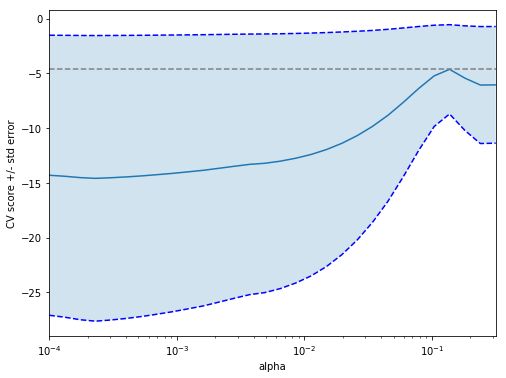

/nAlpha parameters maximising the generalization score on different subsets of the data:
fold 0 alpha: 0.00010, score: 0.00000
fold 1 alpha: 0.00010, score: 0.00000
fold 2 alpha: 0.00281, score: 0.09956
fold 3 alpha: 0.31623, score: -0.41694
fold 4 alpha: 0.00646, score: -65.06524


In [13]:
# lasso = Lasso()
# alphas = np.logspace(-4, -0.5, 30)

# tuned_parameters = [{'alpha': alphas}]
# n_folds = 5

# grd_cv = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
# grd_cv.fit(X, y)
# scores = grd_cv.cv_results_['mean_test_score']
# scores_std = grd_cv.cv_results_['std_test_score']
# plt.figure().set_size_inches(8, 6)
# plt.semilogx(alphas, scores)

# std_error = scores_std / np.sqrt(n_folds)
# plt.semilogx(alphas, scores + std_error, 'b--')
# plt.semilogx(alphas, scores - std_error, 'b--')
# plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

# plt.ylabel('CV score +/- std error')
# plt.xlabel('alpha')
# plt.axhline(np.max(scores), linestyle='--', color='.5')
# plt.xlim([alphas[0], alphas[-1]])
# plt.show()

# lasso_cv = LassoCV(alphas=alphas, cv=n_folds)
# k_fold = KFold(5)
# y = y.to_numpy()
# X = X.to_numpy()
# print("\nAlpha parameters maximising the generalization score on different subsets of the data:")
# for k, (train, test) in enumerate(k_fold.split(X, y)):
#     lasso_cv.fit(X[train], y[train])
#     print("fold {0} alpha: {1:.5f}, score: {2:.5f}".format(k, lasso_cv.alpha_, lasso_cv.score(X[test], y[test])))

Evaluate all 3 models and decide on your best. 

Be clear about decisions you made that led to these models:
    - feature selection
        The only feature selection that I performed was getting rid of variables with a lot of NaN values, or repeat values that would cause collinearity.
    - regularization parameter selection
        High alpha = high complexity. 
        Too high leads to underfitting. Too low leads to overfitting. Higher alpha is higher regularization penalty. Goal is to minimize error in both directions.
    - model evaluation criteria
        
List strengths and limitations of regression as a modeling approach. 
    
Were there things you couldn't do but you wish you could have done?